<a href="https://colab.research.google.com/github/ChubVV/mathpracticum-/blob/hometask6/Hometask6_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Markov Chains


Начнем с небольшого упражнения по Марковским цепям. Пусть мы проводим ежедневные наблюдения за погодой и погода бывает одной из трех типов: солнечной, облачной или дождливой. Опишем все возможные состояния:

In [ ]:
state_wheather = ("sunny", "cloudy", "rainy")

Пусть статистика многодневных наблюдений показывает, что вероятности перемены (или сохранения) состояния погоды опиcываются следующей мaтрицей переходных вероятностей:

In [ ]:
import numpy as np
import pandas as pd
import random
from scipy.stats import norm
import math
import matplotlib.pyplot as plt

transition_matrix = np.array(((0.6, 0.3, 0.1),
                              (0.3, 0.4, 0.3),
                              (0.2, 0.3, 0.5)))

**Задание 1.** Выберите произвольное начальное состояние и смоделируйте 20000 последующих состояний в цепи Маркова с введенной выше матрицей переходов. Результат моделирования (массив размера 20000) запишите в переменную `states`.

In [ ]:
index=[0]

for i in range (20000):
    x=random.choices([0, 1, 2], weights=[transition_matrix[index[i-1]][0],transition_matrix[index[i-1]][1],transition_matrix[index[i-1]][2]])
    index.append(x[0]) 
states = [state_wheather[index[i]] for i in range(0,20000)]    

print(states)

['sunny', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'cloudy', 'cloudy', 'rainy', 'sunny', 'cloudy', 'sunny', 'sunny', 'sunny', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'sunny', 'rainy', 'cloudy', 'rainy', 'rainy', 'rainy', 'sunny', 'cloudy', 'sunny', 'rainy', 'sunny', 'cloudy', 'cloudy', 'sunny', 'rainy', 'sunny', 'rainy', 'sunny', 'rainy', 'sunny', 'rainy', 'cloudy', 'cloudy', 'rainy', 'cloudy', 'sunny', 'sunny', 'cloudy', 'cloudy', 'rainy', 'sunny', 'rainy', 'cloudy', 'rainy', 'cloudy', 'sunny', 'cloudy', 'cloudy', 'sunny', 'cloudy', 'rainy', 'cloudy', 'cloudy', 'rainy', 'sunny', 'cloudy', 'rainy', 'rainy', 'rainy', 'cloudy', 'sunny', 'rainy', 'sunny', 'rainy', 'sunny', 'rainy', 'rainy', 'rainy', 'cloudy', 'rainy', 'cloudy', 'rainy', 'cloudy', 'sunny', 'cloudy', 'sunny', 'rainy', 'sunny', 'sunny', 'sunny', 'sunny', 'sunny', 'rainy', 'sunny', 'rainy', 'cloudy', 'sunny', 'cloudy', 'sunny', 'rainy', 'rainy', 'cloudy', 'rainy', 'sunny', 'cloudy', 'sunny', 'rainy', 'sunny', 'cloudy', 

**Задание 2.** На основе массива `states` рассчитайте, как меняется частота встречаемости каждого из типов погоды в массиве `states[:n]` для `n`, возрастающих от 1 до 20000. На одном рисунке покажите 3 графика: по оси х откладывайте `n`, по у - частоту для каждого из трех типов погоды. Должна получиться примерно следующая картинка:
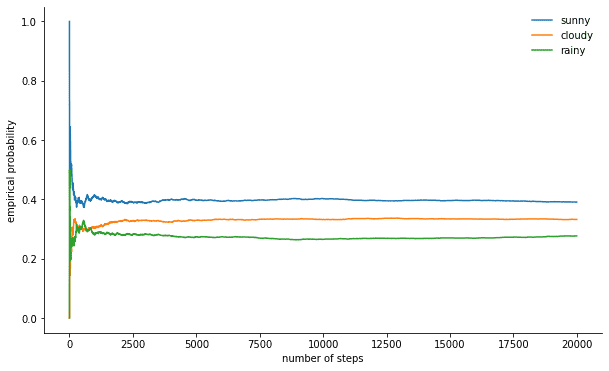

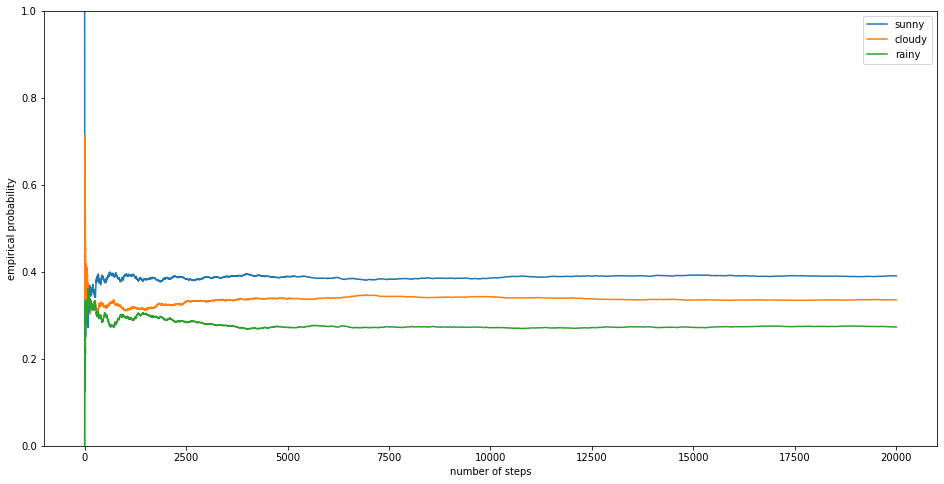

In [ ]:
def frequency(k,n,s):
    m = 0
    for i in range(n):
        if s[i] == k:
            m = m + 1
    return m/n

sunny = [frequency(0, i, index) for i in range(1, 20000)]
cloudy= [frequency(1, i, index) for i in range(1, 20000)]
rainy = [frequency(2, i, index) for i in range(1, 20000)]
x = [i for i in range(1, 20000)]

plt.figure(figsize=(16,8))

plt.plot(x, sunny, label='sunny')
plt.plot(x, cloudy, label='cloudy')
plt.plot(x, rainy, label='rainy')
plt.ylim([0, 1])
plt.xlabel('number of steps')
plt.ylabel('empirical probability')
plt.legend()

plt.show()

**Задание 3.** Как следует из картинки, частоты сходятся к некоторым стационарным значениям. Убедитесь, что эти значения совпадают с решением уравнения на стационарную плотность πP=π, где P - это матрица переходных вероятностей (transition_matrix), а вектор π - искомая стационарная плотность. Дополнительно убедитесь, это этот же вектор возникает в строках матрицы P, при возведении ее во все большие степени.

In [ ]:
dens = np.array([sunny[19998],cloudy[19998],rainy[19998]])
print('Плотность: ', dens)
print('Невязка: ', np.matmul(dens,transition_matrix) - dens)

Плотность:  [0.39091955 0.33576679 0.27331367]
Невязка:  [-0.00097505 -0.00219011  0.00316516]


In [ ]:
for i in range(5):
    transition_matrix=np.matmul(transition_matrix,transition_matrix)
print(transition_matrix, "\n")
for j in range(15):
    transition_matrix=np.matmul(transition_matrix,transition_matrix)
print(transition_matrix, "\n")

print('Весьма похожи')

[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]] 

[[0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]
 [0.38888889 0.33333333 0.27777778]] 

Весьма похожи


Приведенный выше пример показывает, что в некоторых Марковских цепях со временем устанавливается стационарное распределение. Такие цепи называются **эргодическими**. На самом деле, для эргодичности достаточно, чтобы все элементы матрицы Р были строго положительны (об этом говорит эргодическая теорема). Дальше мы этим воспользуемся для моделирования случайных величин.

## MCMC (Markov Chain Monte Carlo)

Рассмотрим разачу: кандидат в губернаторы объезжает города свого края с целью агитации. Каждый день для выбора следующего города он случайным образом намечает один из городов, соседних к текущему. Если число жителей в намеченном городе больше, чем в текущем, кандидат перемещается в намеченный город. В противном случае кандидат перемещается в намеченный город с вероятностью, равной отношению числа жителей этого города к числу жителей текущего, либо остается в текущем еще на один день. Проведя достаточно долгую агитационную кампанию выясняется, что доля времени, проведенная в каждом городе, пропорциональна числу жителей этого города. Тем самым, **процесс перемещения по городам можно рассматривать как процесс генерации случайных величин** (городов) из распределения, которое задается числом жителей в городах. Посмотрим, как это работает:

Задаем популяцию 15 городов случайными числами от 10 до 100:

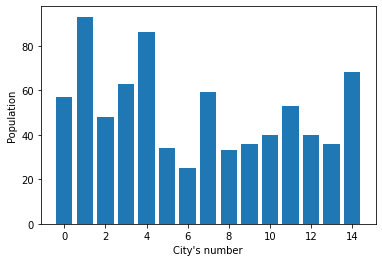

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)
cities = np.random.randint(10, 100, 15)

plt.bar(np.arange(len(cities)), cities)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()

На гистограмму выше нужно смотреть как на распределение, из которого мы хотим научиться моделировать случайные величины. 

Задаем функцию, которая определяет номер следующего города, куда отправляется кандитат (возможно, остается в текущем городе). Для простоты будем перемещаться только в города с номерами на 1 больше или меньше, чем текущий:

In [ ]:
def step(current, cities):
    direction = np.random.choice([-1, 1])
    target = (current + direction) % len(cities)
    ratio = cities[target] / cities[current]
    return target if np.random.rand() < ratio else current

Моделируем перемещения кандитата за период 10000 дней:

In [ ]:
walk = []
current = 1 # стартуем из города с номером 1
for i in range(10000):
    current = step(current, cities)
    walk.append(current)

Рисуем гистограмму распределения доли времени, проведенного в каждом городе:

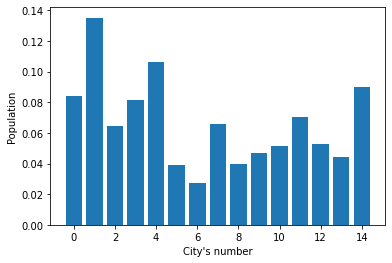

In [ ]:
plt.hist(walk, bins=np.arange(len(cities) + 1) - 0.5, rwidth=0.8, density=True)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()

Полученная гистограмма почти не отличается от гистограммы, задающей распределения числа жителей по городам. Таким образом, массив ```walk``` можно рассматривать как выборку из данного распределения, а предложенный процесс обхода городов - как генератор случайных чисел из этого распределения. 

Несколько замечаний:
* Полезно отбросить начальный кусок массива ```walk```, пока последовательность не вышла на стационарный режим
* В нашей реализации соседные элементы массива ```walk``` сильно скоррелированы (по определению, они отличаются не более чем на 1). Поэтому полезно проредить ряд, например, рассматривать каждый сотый элемент, и это даст выборку из почти независимых величин.

Общая идея MCMC:
* построить эргодическую цепь Маркова, для которой стационарное распределение - это в точности наше заданное распределение

* инициировать блуждание по цепи Маркова из некоторого начального состояния и дождаться, когда распределение сойдется в стационарному. С этого момента состояния цепи Маркова можно считать выборкой из желаемого распределения.

Алгоритм Metropolis sampling:
* пусть $\pi$ - заданное распределение (не обязательно нормированное к 1) на множестве $\Omega$
* пусть $Q = (q_{i, j})$ - матрица переходных вероятностей произвольной эргодической цепи Маркова с состояниями из $\Omega$
* выберем произвольное $X_0$ из $\Omega$
* для текущего $X_n$ смоделируем значение $Z_{n+1}$ из распределения $q_{X_n, \cdot}$
* смоделируем случайную величину $\alpha$ из распределения Бернулли с вероятностью успеха
$$
p = \min ( 1, \frac{\pi_i q_{i, j}}{\pi_j q_{j, i}} )
$$
* если $\alpha$ = 1, то $X_{n+1} = Z_{n+1}$, иначе $X_{n+1} = X_{n}$.

Реализуем алгоритм Metropolis sampling. Функция `metroplis` принимает на вход
* начальное состояние цепи Маркова (`start`)
* функцию, вычисляющую значение плотности в произвольной точке (функция `value`)
* функцию, предлагающую выбор нового состояния (функция `proposal`)
* количество итераций (`niter`)

In [ ]:
def metroplis(start, value, proposal, niter, nburn=0, **kwargs):
    '''Generic Metropolis scheme.

    Parameters
    ---
    start : misc
        Initial guess.
    value : callable
        Function to calculate density (unnormalized) at given point.
    proposal : callable
        Function to get suggestion on a new point based on a current one.
    niter : int
        Number of iterations.
    nburn : int
        Number of initial samples to be skipped.
    kwargs : dict
        Keywords to be passed in value and proposal.

    Return
    ---
    post : list
        List of samples obtained.
    '''
    current = start
    post = [current]
    for i in range(niter):
        proposed = proposal(current, **kwargs)
        p = value(proposed, **kwargs) / value(current, **kwargs)
        if np.random.rand() < p:
            current = proposed
        post.append(current)
    return post[nburn:]

В приложение к предыдущей задаче вот как определяются `value` и `proposal` и как выглядит гистограмма, полученная по смоделированной выборке:

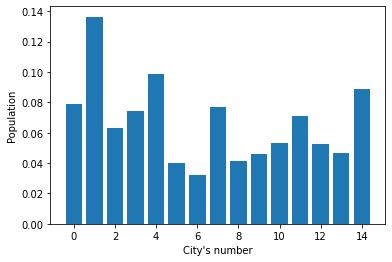

In [ ]:
value = lambda x: cities[x]
proposal = lambda x: (x + np.random.choice([-1, 1])) % len(cities)
post = metroplis(1, value, proposal, 10000)

plt.hist(post, bins=np.arange(len(cities) + 1) - 0.5, rwidth=0.8, density=True)
plt.xlabel('City\'s number')
plt.ylabel('Population')
plt.show()

**Задание 4.** Примените алгоритм Metropolis для генерации выборки из смеси двух гауссиан. Плотность смеси задается в виде 
p(x) = 0.3N(-4, 2) + 0.7N(3, 6), где N(a, b) - плотность нормального распределения со средним a и дисперсией b. Для наглядности, ниже приведен график плотности смеси. Покажите, что гистограмма, построенная по выборке, приближает заданную плотность смеси.

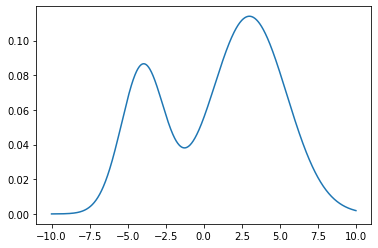

In [ ]:
from scipy.stats import norm

x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)

plt.plot(x, y)
plt.show()

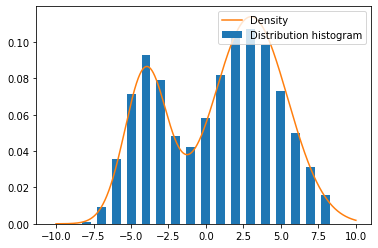

In [ ]:

value = lambda x: 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
proposal = lambda x: (x + np.random.choice([-1, 1]))

post = metroplis(0, value, proposal, 10000)
    
plt.hist(post, bins = np.arange(20)-10.5, rwidth = 0.6, density = True, label = 'Distribution histogram')
plt.legend(loc='upper right')

x = np.linspace(-10, 10, 1000)
y = 0.3*norm(-4, np.sqrt(2)).pdf(x) + 0.7*norm(3, np.sqrt(6)).pdf(x)
plt.plot(x, y, label = 'Density')
plt.legend(loc='upper right')

plt.show()

## Литература

*  http://probability.ca/jeff/ftpdir/johannes.pdf
* http://nitro.biosci.arizona.edu/courses/EEB596/handouts/Gibbs.pdf
